Import necessary libraries

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

Load the Dataset

In [195]:
dataset = pd.read_csv('data_set\Student_Marks.csv')

In [196]:
len(dataset)

100

In [197]:
dataset.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [198]:
dataset.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [199]:
dataset.shape

(100, 3)

In [200]:
dataset.count()

number_courses    100
time_study         96
Marks             100
dtype: int64

In [201]:
dataset.describe()

,number_courses,time_study,Marks
count,100.000000,96.000000,100.000000
mean,5.290000,4.024667,24.432200
std,1.799523,2.402009,14.332969
min,3.000000,0.096000,5.905000
25%,4.000000,2.033750,12.633000
50%,5.000000,3.933500,20.059500
75%,7.000000,6.198750,36.676250
max,8.000000,7.957000,55.299000


In [202]:
dataset.dtypes

number_courses      int64
time_study        float64
Marks             float64
dtype: object

In [203]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      96 non-null     float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [204]:
dataset.isnull().any()

number_courses    False
time_study         True
Marks             False
dtype: bool

In [205]:
dataset.isnull().sum()

number_courses    0
time_study        4
Marks             0
dtype: int64

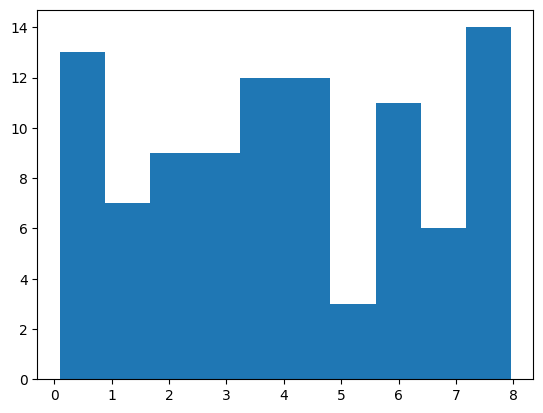

In [206]:
fig = plt.hist(dataset.time_study)

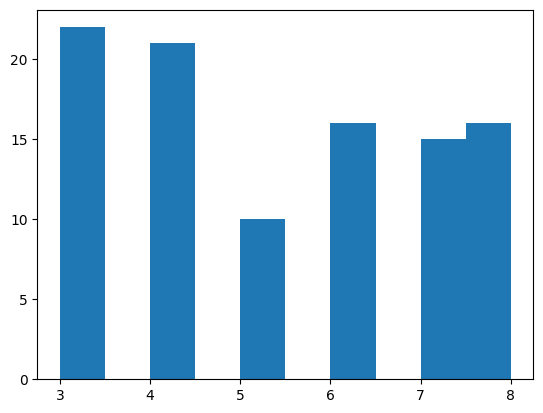

In [207]:
fig = plt.hist(dataset.number_courses)

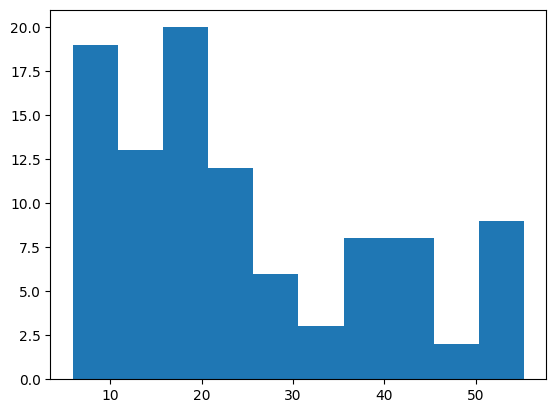

In [208]:
fig = plt.hist(dataset.Marks)

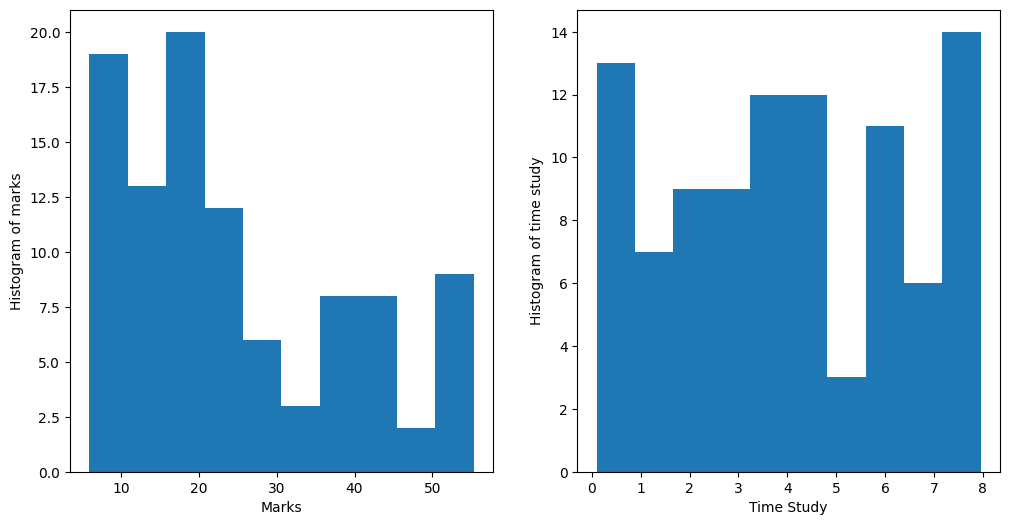

In [209]:
fig = plt.figure(figsize=(12,6))
marks = fig.add_subplot(121)
time_study = fig.add_subplot(122)

marks.hist(dataset.Marks, bins=10)
marks.set_xlabel('Marks')
marks.set_ylabel('Histogram of marks')

time_study.hist(dataset.time_study, bins=10)
time_study.set_xlabel('Time Study')
time_study.set_ylabel('Histogram of time study')

plt.show()

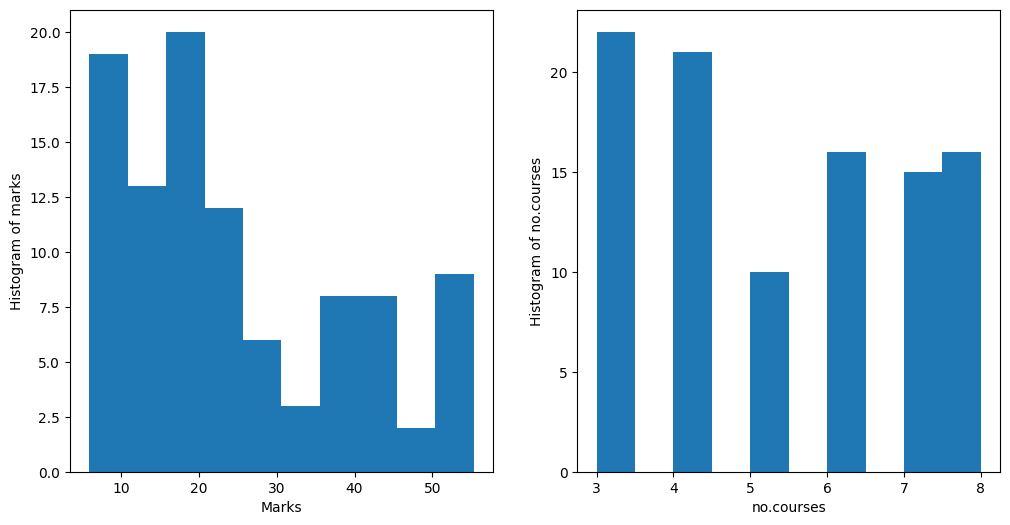

In [210]:
fig = plt.figure(figsize=(12,6))
marks = fig.add_subplot(121)
number_courses = fig.add_subplot(122)

marks.hist(dataset.Marks, bins=10)
marks.set_xlabel('Marks')
marks.set_ylabel('Histogram of marks')

number_courses.hist(dataset.number_courses, bins=10)
number_courses.set_xlabel('no.courses')
number_courses.set_ylabel('Histogram of no.courses')

plt.show()

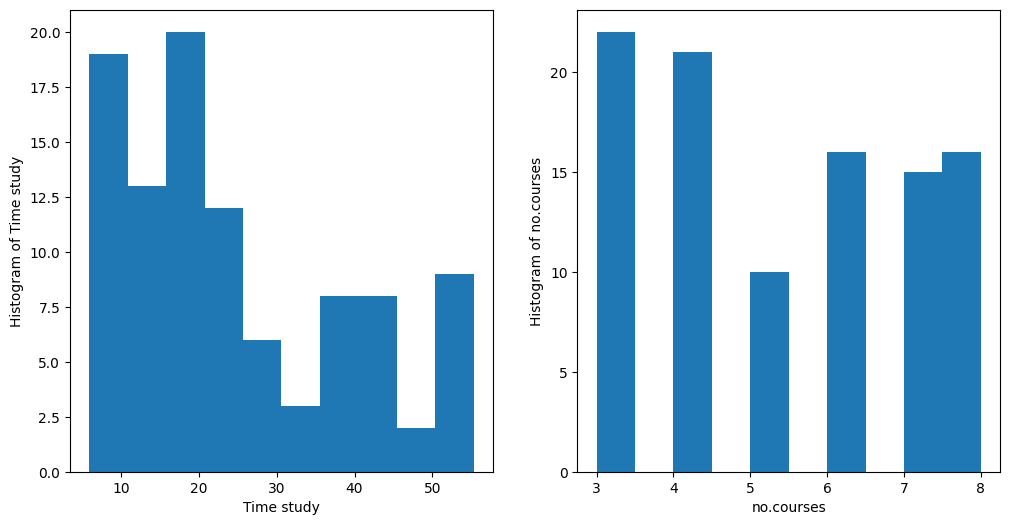

In [211]:
fig = plt.figure(figsize=(12,6))
time_study= fig.add_subplot(121)
number_courses = fig.add_subplot(122)

time_study.hist(dataset.Marks, bins=10)
time_study.set_xlabel('Time study')
time_study.set_ylabel('Histogram of Time study')

number_courses.hist(dataset.number_courses, bins=10)
number_courses.set_xlabel('no.courses')
number_courses.set_ylabel('Histogram of no.courses')

plt.show()

Text(0, 0.5, 'Time Study')

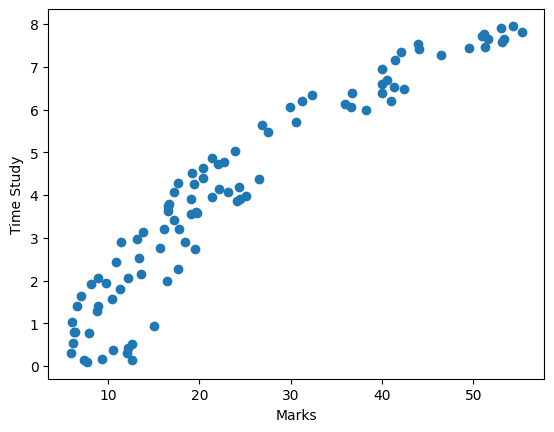

In [212]:
fig = plt.scatter(dataset.Marks, dataset.time_study)
plt.xlabel('Marks')
plt.ylabel('Time Study')

Text(0, 0.5, 'Time Study')

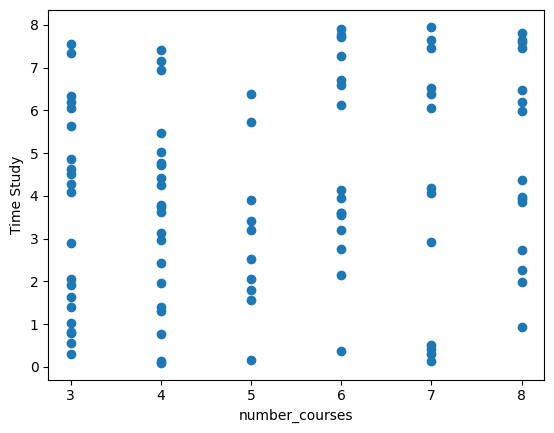

In [213]:
fig = plt.scatter(dataset.number_courses, dataset.time_study)
plt.xlabel('number_courses')
plt.ylabel('Time Study')

Text(0, 0.5, 'Marks')

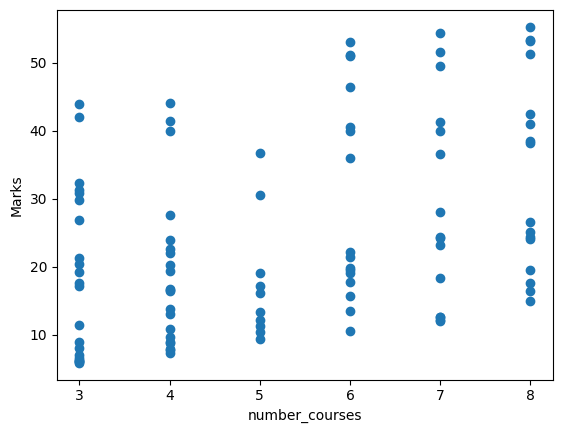

In [214]:
fig = plt.scatter(dataset.number_courses, dataset.Marks)
plt.xlabel('number_courses')
plt.ylabel('Marks')

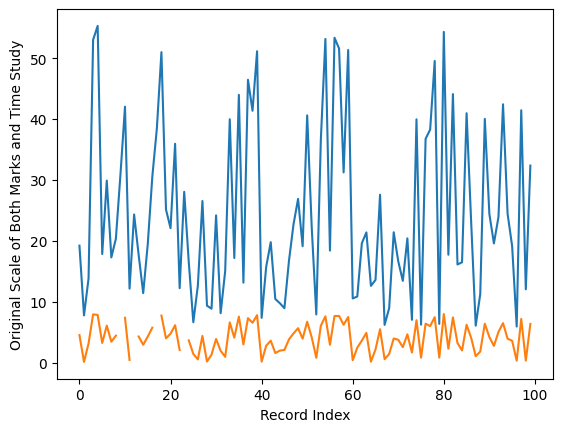

In [215]:
plt.plot(dataset.Marks)
plt.plot(dataset.time_study)

plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both Marks and Time Study')

plt.show()
         

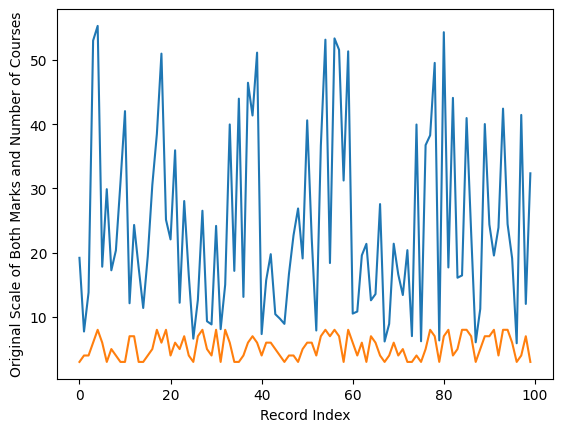

In [216]:
plt.plot(dataset.Marks)
plt.plot(dataset.number_courses)

plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both Marks and Number of Courses')

plt.show()
         

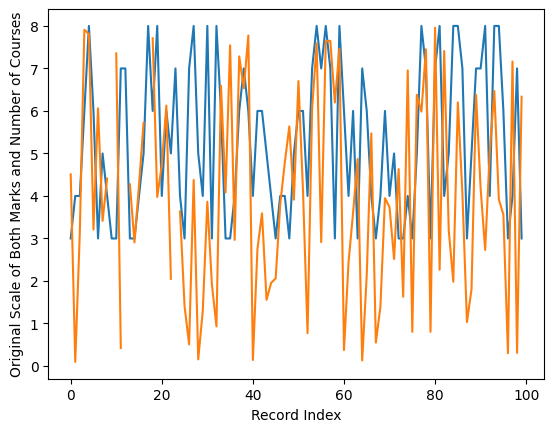

In [217]:
plt.plot(dataset.number_courses)
plt.plot(dataset.time_study)

plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both Marks and Number of Courses')

plt.show()
         

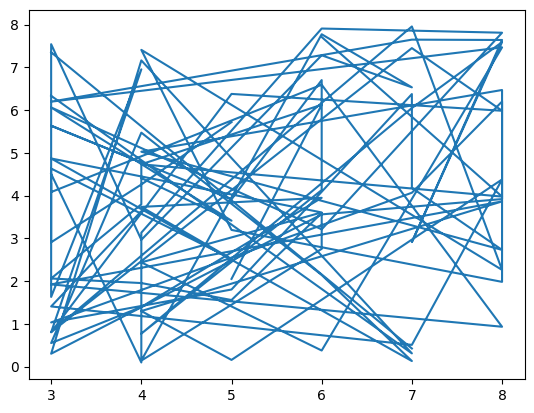

In [218]:
plt.plot(dataset['number_courses'], dataset['time_study'])

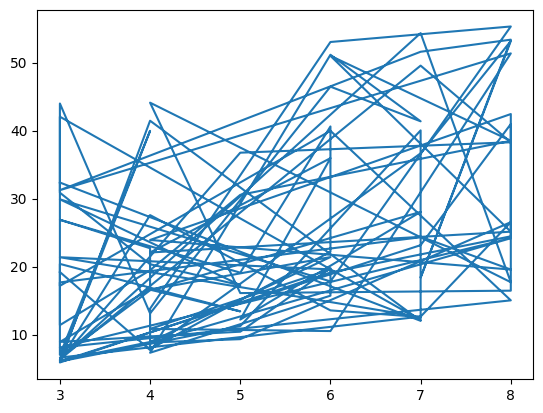

In [219]:
plt.plot(dataset['number_courses'], dataset['Marks'])

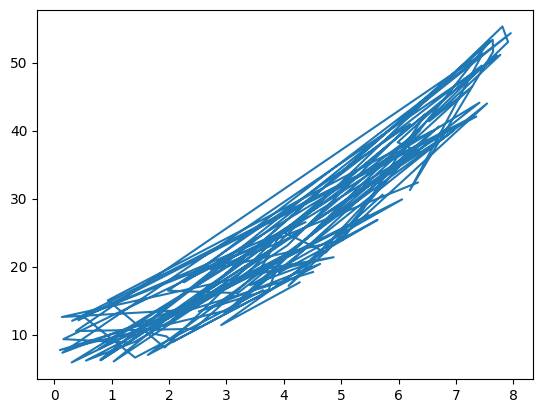

In [220]:
plt.plot(dataset['time_study'], dataset['Marks'])

Identify features and target variable

In [221]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, -1].values

print(X)

[[3.    4.508]
 [4.    0.096]
 [4.    3.133]
 [6.    7.909]
 [8.    7.811]
 [6.    3.211]
 [3.    6.063]
 [5.    3.413]
 [4.    4.41 ]
 [3.      nan]
 [3.    7.353]
 [7.    0.423]
 [7.      nan]
 [3.    4.274]
 [3.    2.908]
 [4.    4.26 ]
 [5.    5.719]
 [8.      nan]
 [6.    7.711]
 [8.    3.977]
 [4.    4.733]
 [6.    6.126]
 [5.    2.051]
 [7.      nan]
 [4.    3.635]
 [3.    1.407]
 [7.    0.508]
 [8.    4.378]
 [5.    0.156]
 [4.    1.299]
 [8.    3.864]
 [3.    1.923]
 [8.    0.932]
 [6.    6.594]
 [3.    4.083]
 [3.    7.543]
 [4.    2.966]
 [6.    7.283]
 [7.    6.533]
 [6.    7.775]
 [4.    0.14 ]
 [6.    2.754]
 [6.    3.591]
 [5.    1.557]
 [4.    1.954]
 [3.    2.061]
 [4.    3.797]
 [4.    4.779]
 [3.    5.635]
 [5.    3.913]
 [6.    6.703]
 [6.    4.13 ]
 [4.    0.771]
 [7.    6.049]
 [8.    7.591]
 [7.    2.913]
 [8.    7.641]
 [7.    7.649]
 [3.    6.198]
 [8.    7.468]
 [6.    0.376]
 [4.    2.438]
 [6.    3.606]
 [3.    4.869]
 [7.    0.13 ]
 [6.    2.142]
 [4.    5.

Handle Missing Data

In [222]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:,1:3] = imputer.transform(X[:, 1:3])
print(X[:, 1:3])

[[4.508     ]
 [0.096     ]
 [3.133     ]
 [7.909     ]
 [7.811     ]
 [3.211     ]
 [6.063     ]
 [3.413     ]
 [4.41      ]
 [4.02466667]
 [7.353     ]
 [0.423     ]
 [4.02466667]
 [4.274     ]
 [2.908     ]
 [4.26      ]
 [5.719     ]
 [4.02466667]
 [7.711     ]
 [3.977     ]
 [4.733     ]
 [6.126     ]
 [2.051     ]
 [4.02466667]
 [3.635     ]
 [1.407     ]
 [0.508     ]
 [4.378     ]
 [0.156     ]
 [1.299     ]
 [3.864     ]
 [1.923     ]
 [0.932     ]
 [6.594     ]
 [4.083     ]
 [7.543     ]
 [2.966     ]
 [7.283     ]
 [6.533     ]
 [7.775     ]
 [0.14      ]
 [2.754     ]
 [3.591     ]
 [1.557     ]
 [1.954     ]
 [2.061     ]
 [3.797     ]
 [4.779     ]
 [5.635     ]
 [3.913     ]
 [6.703     ]
 [4.13      ]
 [0.771     ]
 [6.049     ]
 [7.591     ]
 [2.913     ]
 [7.641     ]
 [7.649     ]
 [6.198     ]
 [7.468     ]
 [0.376     ]
 [2.438     ]
 [3.606     ]
 [4.869     ]
 [0.13      ]
 [2.142     ]
 [5.473     ]
 [0.55      ]
 [1.395     ]
 [3.948     ]
 [3.736     ]
 [2.51

Feature Scaling

In [223]:
sc = StandardScaler()
sc.fit(X[:, 1:3])
X[:, 1:3] = sc.transform(X[:, 1:3])
X[:, 1:3]

array([[ 0.2064478 ],
       [-1.67806471],
       [-0.38086061],
       [ 1.65912846],
       [ 1.61726939],
       [-0.3475442 ],
       [ 0.87064023],
       [-0.26126326],
       [ 0.16458873],
       [ 0.        ],
       [ 1.4216423 ],
       [-1.53839209],
       [ 0.        ],
       [ 0.10649859],
       [-0.47696562],
       [ 0.10051872],
       [ 0.72370634],
       [ 0.        ],
       [ 1.57455605],
       [-0.02036002],
       [ 0.30255282],
       [ 0.89754963],
       [-0.84301893],
       [ 0.        ],
       [-0.16643964],
       [-1.11809284],
       [-1.50208575],
       [ 0.15092046],
       [-1.65243671],
       [-1.16422324],
       [-0.0686261 ],
       [-0.89769201],
       [-1.3209812 ],
       [ 1.09744806],
       [ 0.02491611],
       [ 1.50279764],
       [-0.45219188],
       [ 1.39174296],
       [ 1.07139292],
       [ 1.60189259],
       [-1.65927084],
       [-0.54274416],
       [-0.18523351],
       [-1.05402283],
       [-0.88445087],
       [-0

In [224]:
rs = RobustScaler()
rs.fit(X[:, 1:3])
X[:, 1:3] = rs.transform(X[:, 1:3])
X[:, 1:3]

array([[ 0.12413821],
       [-0.95577857],
       [-0.2124179 ],
       [ 0.95659446],
       [ 0.93260719],
       [-0.19332599],
       [ 0.50475258],
       [-0.14388284],
       [ 0.10015094],
       [ 0.00583364],
       [ 0.82050341],
       [-0.8757394 ],
       [ 0.00583364],
       [ 0.06686248],
       [-0.26749072],
       [ 0.06343573],
       [ 0.42055236],
       [ 0.00583364],
       [ 0.90813038],
       [-0.00583364],
       [ 0.17921103],
       [ 0.52017297],
       [-0.47725697],
       [ 0.00583364],
       [-0.08954432],
       [-0.63488761],
       [-0.85493412],
       [ 0.09231836],
       [-0.94109248],
       [-0.66132256],
       [-0.03349243],
       [-0.50858728],
       [-0.75115245],
       [ 0.63472443],
       [ 0.02011178],
       [ 0.86700934],
       [-0.25329417],
       [ 0.80336964],
       [ 0.61979358],
       [ 0.92379554],
       [-0.94500877],
       [-0.305185  ],
       [-0.10031412],
       [-0.5981724 ],
       [-0.50099947],
       [-0

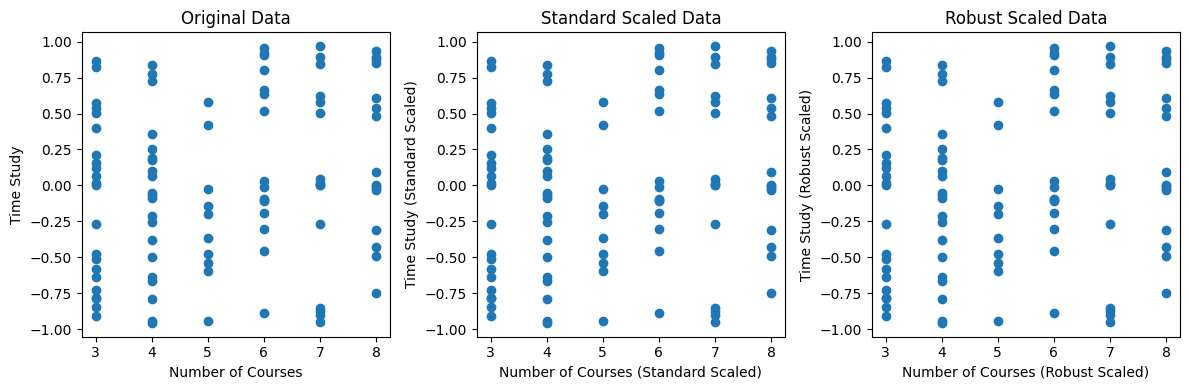

In [225]:
# Original Data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Original Data')
plt.xlabel('Number of Courses')
plt.ylabel('Time Study')

# StandardScaled Data
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Standard Scaled Data')
plt.xlabel('Number of Courses (Standard Scaled)')
plt.ylabel('Time Study (Standard Scaled)')

# RobustScaled Data
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Robust Scaled Data')
plt.xlabel('Number of Courses (Robust Scaled)')
plt.ylabel('Time Study (Robust Scaled)')

plt.tight_layout()
plt.show()

Split the Dataset

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Linear Regression

In [227]:
lin_model = LinearRegression()

In [228]:
lin_model.fit(X_train, y_train)

LinearRegression()

Predict New Values

In [229]:
preds = lin_model.predict(X_test)

In [230]:
df= {'actual':y_test, 'preds':preds}
pd.DataFrame(data=df)

,actual,preds
0,30.548,32.699683
1,7.734,1.103250
2,10.429,10.696925
3,6.185,1.633381
4,40.024,39.912924
5,35.939,36.721300
6,41.444,38.463531
7,22.184,26.169281
8,29.889,30.778312
9,15.725,18.894943


Visualize the dataset after performing the model (predicted results VS. actual results)

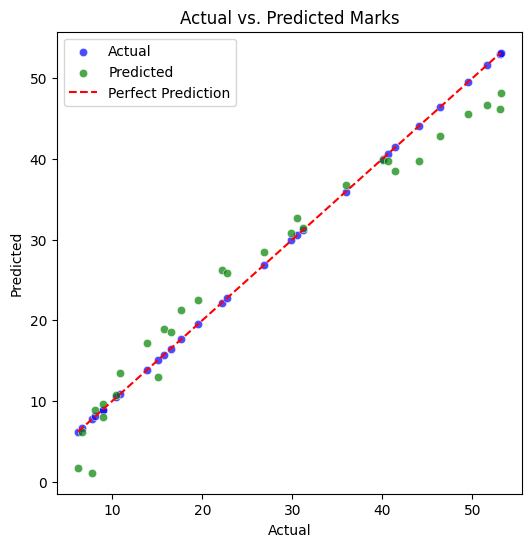

In [231]:
plt.figure(figsize=(6, 6))

sns.scatterplot(x=y_test, y=y_test, alpha=0.7, color='blue', marker='o', label='Actual')
sns.scatterplot(x=y_test, y=preds, alpha=0.7, color='green', marker='o', label='Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Marks')
plt.legend()
plt.show()

Evaluate the Model using MAE / RMSE / r2_score

In [232]:
MAE = mean_absolute_error(y_test, preds)
RMSE = np.sqrt(mean_squared_error(y_test, preds))
r2_lin = r2_score(y_test, preds)

print(f'Mean Absolute Error (MAE): {MAE:.2f}')
print(f'Root Mean Squared Error (RMSE): {RMSE:.2f}')
print(f'r2_score: {r2_lin:.2f}')

Mean Absolute Error (MAE): 2.66
Root Mean Squared Error (RMSE): 3.23
r2_score: 0.96


Random Forest Regression

In [233]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [234]:
preds_rf = rf_model.predict(X_test)

In [235]:
df= {'actual':y_test, 'preds':preds_rf}
pd.DataFrame(data=df)

,actual,preds
0,30.548,30.61535
1,7.734,7.60156
2,10.429,11.12102
3,6.185,6.17899
4,40.024,37.68157
5,35.939,38.14232
6,41.444,42.02777
7,22.184,21.71139
8,29.889,34.81670
9,15.725,14.67557


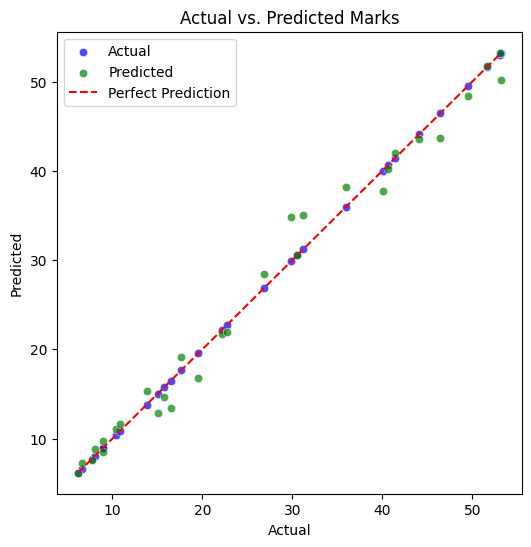

In [236]:
plt.figure(figsize=(6, 6))

sns.scatterplot(x=y_test, y=y_test, alpha=0.7, color='blue', marker='o', label='Actual')
sns.scatterplot(x=y_test, y=preds_rf, alpha=0.7, color='green', marker='o', label='Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Marks')

plt.legend()
plt.show()

In [237]:
MAE_rf = mean_absolute_error(y_test, preds_rf)
RMSE_rf = np.sqrt(mean_squared_error(y_test, preds_rf))
r2_rf = r2_score(y_test, preds_rf)

print(f'Mean Absolute Error (MAE): {MAE_rf:.2f}')
print(f'Root Mean Squared Error (RMSE): {RMSE_rf:.2f}')
print(f'r2_score: {r2_rf:.2f}')

Mean Absolute Error (MAE): 1.38
Root Mean Squared Error (RMSE): 1.84
r2_score: 0.99


Compare The Tow Models

In [238]:
print("Compare r2_score of Linear Regression and Random Forest Regression:\n")
if r2_lin > r2_rf:
    print("Linear Regression performs better on.")
elif r2_rf > r2_lin:
    print("Random Forest Regression performs better.")
else:
    print("Both models have similar performance.")

Compare r2_score of Linear Regression and Random Forest Regression:

Random Forest Regression performs better.


In [239]:
print("Compare MAE of Linear Regression and Random Forest Regression:\n")
if MAE_rf < MAE:
    print("Random Forest Regression performs better.")
elif MAE < MAE_rf:
    print("Linear Regression performs better.")
else:
    print("Both models have similar performance.")   

Compare MAE of Linear Regression and Random Forest Regression:

Random Forest Regression performs better.
